In [1]:
import torch
from torch import nn
from torch.autograd import Variable
from torchviz import make_dot, make_dot_from_trace

In [2]:

class SRCNN(nn.Module):
    def __init__(self, num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=9, padding=9 // 2,bias=False)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=5, padding=5 // 2,bias=False)
        self.conv3 = nn.Conv2d(32, num_channels, kernel_size=5, padding=5 // 2,bias=False)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.conv3(x)
        return x
model = SRCNN()
print(model)

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4), bias=False)
  (conv2): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (relu): ReLU(inplace=True)
)


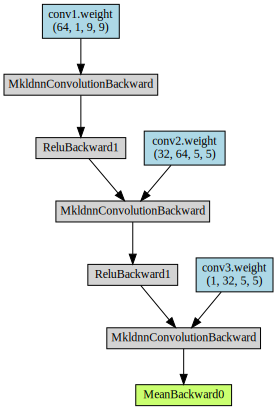

In [3]:
x = Variable(torch.randn(1,1,33,33))
y = model(x)
make_dot(y.mean(),params=dict(model.named_parameters()))

In [4]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    5184    |
| conv2.weight |   51200    |
| conv3.weight |    800     |
+--------------+------------+
Total Trainable Params: 57184


57184

In [5]:
class SRCNN(nn.Module):
    def __init__(self, num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv4 = nn.Conv2d(64, num_channels, kernel_size=3, padding=3 // 2,bias=False)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.relu(self.conv1(x))
        x2 = self.relu(self.conv2(x1))
        x3 = self.relu(self.conv2(x2))
        x4 = self.relu(self.conv2(x3))
        return x4
model1 = SRCNN()
print(model1)

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv4): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (relu): ReLU(inplace=True)
)


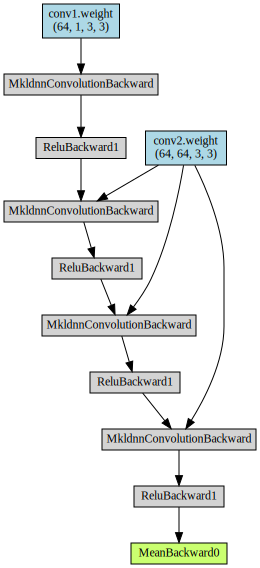

In [6]:
x = Variable(torch.randn(1,1,33,33))
y = model1(x)
make_dot(y.mean(),params=dict(model1.named_parameters()))

In [7]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model1)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    576     |
| conv2.weight |   36864    |
| conv3.weight |   36864    |
| conv4.weight |    576     |
+--------------+------------+
Total Trainable Params: 74880


74880

In [8]:
class SRCNN(nn.Module):
    def __init__(self, num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv4 = nn.Conv2d(64, num_channels, kernel_size=3, padding=3 // 2,bias=False)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.relu(self.conv1(x))
        x2 = self.relu(self.conv2(x1))
        x3 = self.relu(self.conv2(x2))
        x4 = self.relu(self.conv2(x3))
        #x5 = self.conv3(x4)
        output = torch.cat([x1,x3],1)
        return output
model2 = SRCNN()
print(model2)

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv4): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (relu): ReLU(inplace=True)
)


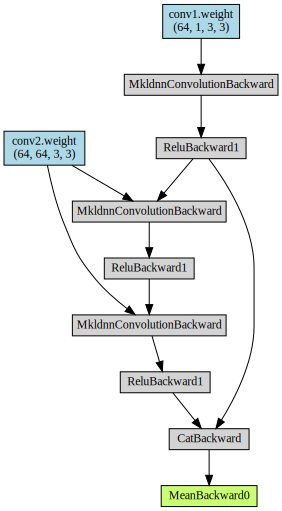

In [9]:
x = Variable(torch.randn(1,1,33,33))
y = model2(x)
make_dot(y.mean(),params=dict(model2.named_parameters()))

In [10]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model2)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    576     |
| conv2.weight |   36864    |
| conv3.weight |   36864    |
| conv4.weight |    576     |
+--------------+------------+
Total Trainable Params: 74880


74880

In [11]:
class SRCNN(nn.Module):
    def __init__(self, num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv4 = nn.Conv2d(64, num_channels, kernel_size=3, padding=3 // 2,bias=False)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.relu(self.conv1(x))
        x2 = self.relu(self.conv2(x1))
        x3 = self.relu(self.conv2(x2))
        x4 = self.relu(self.conv2(x3))
        x5 = self.conv3(x4)
        output = torch.cat([x1,x3,x5],1)
        return output
model3 = SRCNN()
print(model3)

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv4): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (relu): ReLU(inplace=True)
)


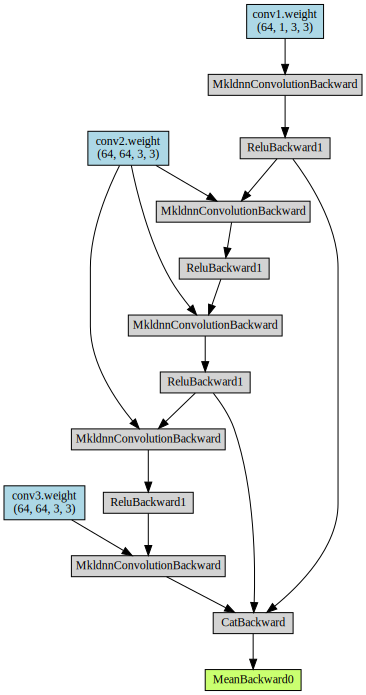

In [12]:
x = Variable(torch.randn(1,1,33,33))
y = model3(x)
make_dot(y.mean(),params=dict(model3.named_parameters()))

In [13]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model3)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    576     |
| conv2.weight |   36864    |
| conv3.weight |   36864    |
| conv4.weight |    576     |
+--------------+------------+
Total Trainable Params: 74880


74880

In [14]:
class SRCNN(nn.Module):
    def __init__(self, num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=False)
        self.conv3 = nn.Conv2d(64, num_channels, kernel_size=3, padding=3 // 2,bias=False)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.relu(self.conv1(x))
        x2 = self.relu(self.conv2(x1))
        x3 = self.relu(self.conv3(x2))
        return x3
model5 = SRCNN()
print(model5)

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv3): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (relu): ReLU(inplace=True)
)


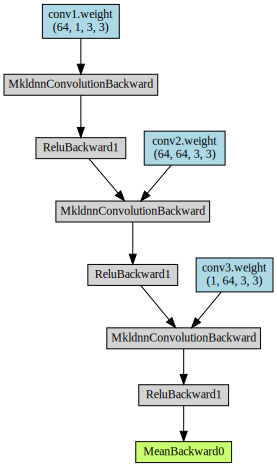

In [15]:
x = Variable(torch.randn(1,1,33,33))
y = model5(x)
make_dot(y.mean(),params=dict(model5.named_parameters()))

In [16]:
class depthwise_separable_conv(nn.Module):
    def __init__(self, nin, nout, kernel_size, padding, bias=False):
        super(depthwise_separable_conv, self).__init__()
        self.depthwise = nn.Conv2d(nin, nin, kernel_size=kernel_size, padding=padding, groups=nin, bias=bias)
        self.pointwise = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)

    def forward(self, x):
        out = self.depthwise(x)
        out = self.pointwise(out)
        return out

In [17]:
depthwise_separable_conv(64, 128, 3, 1)

depthwise_separable_conv(
  (depthwise): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
  (pointwise): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
)

In [18]:
#https://github.com/yjn870/SRCNN-pytorch
from torch import nn


class SRCNN(nn.Module):
    def __init__(self, d=32,num_channels=1):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=9, padding=9 // 2,bias=False)
        self.prelu1 = nn.PReLU()
        #self.conv2 = nn.Conv2d(64, 64, kernel_size=5, padding=5 // 2,bias=False)
        self.conv2 = depthwise_separable_conv(64, 64, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu2 = nn.PReLU()
        self.conv3 = nn.Conv2d(64, 64, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu3 = nn.PReLU()
        self.conv4 = nn.Conv2d(64, 64, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu4 = nn.PReLU()
        self.conv5 = nn.Conv2d(64, 32, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu5 = nn.PReLU()
        self.conv6 = nn.Conv2d(32, num_channels, kernel_size=5, padding=5 // 2,bias=False)
        self.prelu6 = nn.PReLU()
        

    def forward(self, x):
        x1 = self.prelu1(self.conv1(x))
        x2 = self.prelu2(self.conv2(x))
        x3 = self.prelu3(self.conv3(x))
        x4 = self.prelu4(self.conv4(x))
        x5 = self.prelu5(self.conv5(x))
        x6 = self.prelu6(self.conv6(x))
        output = torch.cat([x3, x6], 1)
        return output
model6 = SRCNN()
print(model6)

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4), bias=False)
  (prelu1): PReLU(num_parameters=1)
  (conv2): depthwise_separable_conv(
    (depthwise): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=64, bias=False)
    (pointwise): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (prelu2): PReLU(num_parameters=1)
  (conv3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (prelu3): PReLU(num_parameters=1)
  (conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (prelu4): PReLU(num_parameters=1)
  (conv5): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (prelu5): PReLU(num_parameters=1)
  (conv6): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
  (prelu6): PReLU(num_parameters=1)
)


In [19]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model6)

+------------------------+------------+
|        Modules         | Parameters |
+------------------------+------------+
|      conv1.weight      |    5184    |
|     prelu1.weight      |     1      |
| conv2.depthwise.weight |    1600    |
| conv2.pointwise.weight |    4096    |
|     prelu2.weight      |     1      |
|      conv3.weight      |   102400   |
|     prelu3.weight      |     1      |
|      conv4.weight      |   102400   |
|     prelu4.weight      |     1      |
|      conv5.weight      |   51200    |
|     prelu5.weight      |     1      |
|      conv6.weight      |    800     |
|     prelu6.weight      |     1      |
+------------------------+------------+
Total Trainable Params: 267686


267686